Write a program to do following:  
Data Set: https://www.kaggle.com/shwetabh123/mall-customers
This dataset givesthe data of Income and money spent by the customers visiting a shopping
mall.
The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore,
asa mall owner you need to find the group of people who are the profitable customers for the
mallowner. Apply at least two clustering algorithms (based on Spending Score) to find the
group ofcustomers.
a) Apply Data pre-processing  
b) Perform data-preparation (Train-Test Split)
c) Apply Machine Learning Algorithm
d) Evaluate Model.
e) Apply Cross-Validation and Evaluate Mode

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
print(df.head())
print(df.info())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
# Selecting relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
# Feature Scaling (Recommended for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
## **1️⃣ K-Means Clustering**
# Finding the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):  # Checking clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

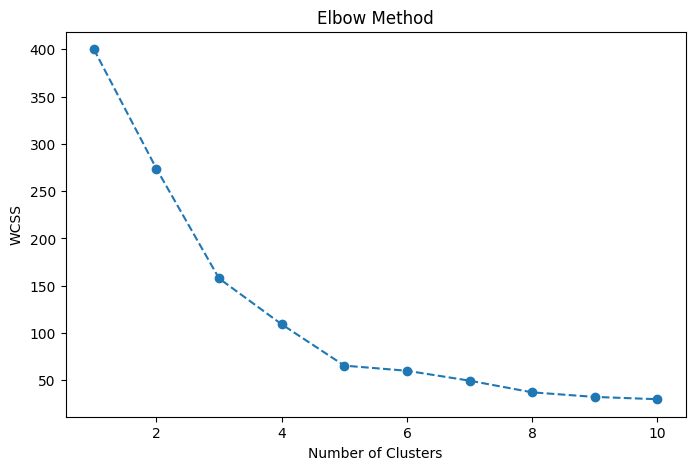

In [8]:
# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [9]:

# Applying K-Means with optimal K (let’s assume 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

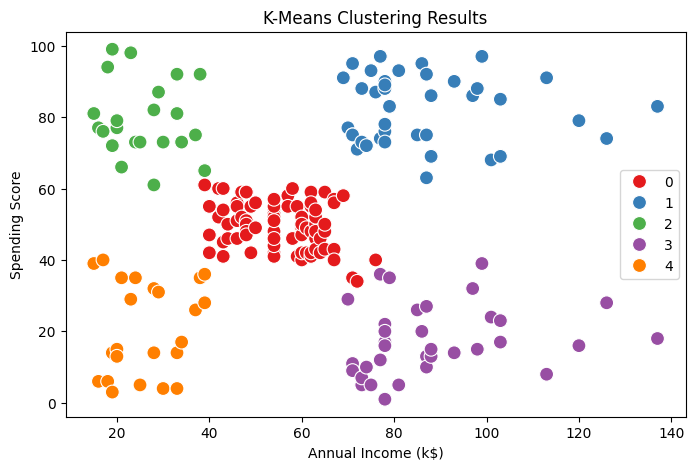

In [10]:
# Visualizing K-Means clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['KMeans_Cluster'], palette='Set1', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

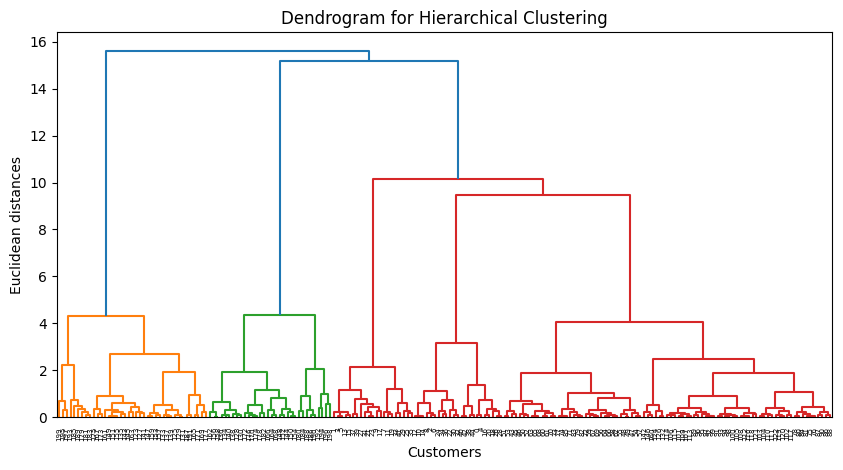

In [11]:
## **2️⃣ Hierarchical Clustering**
# Using dendrogram to find the best number of clusters
plt.figure(figsize=(10, 5))
dendrogram(linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
# Applying Hierarchical Clustering with 5 clusters
hc = AgglomerativeClustering(n_clusters=5,  linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(X_scaled)

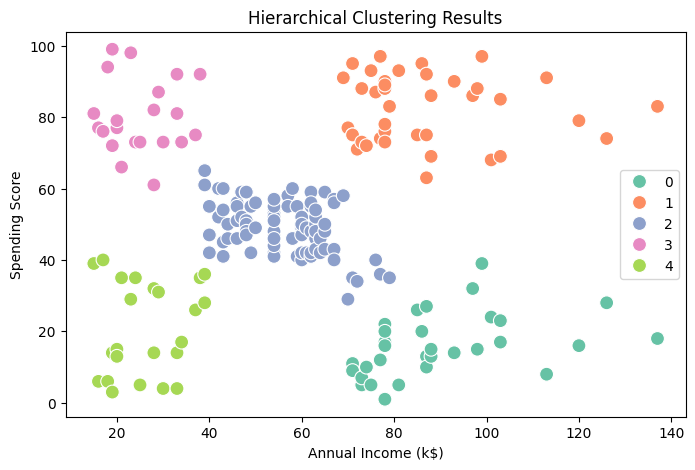

In [14]:
# Visualizing Hierarchical Clustering
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Hierarchical_Cluster'], palette='Set2', s=100)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import KFold

In [17]:
# Evaluate K-Means Clustering
silhouette_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])
dbi_kmeans = davies_bouldin_score(X_scaled, df['KMeans_Cluster'])
ch_kmeans = calinski_harabasz_score(X_scaled, df['KMeans_Cluster'])

print(f"K-Means Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {dbi_kmeans:.4f}")
print(f"Calinski-Harabasz Index: {ch_kmeans:.4f}")

K-Means Evaluation Metrics:
Silhouette Score: 0.5547
Davies-Bouldin Index: 0.5722
Calinski-Harabasz Index: 248.6493


In [18]:
# Evaluate Hierarchical Clustering
silhouette_hc = silhouette_score(X_scaled, df['Hierarchical_Cluster'])
dbi_hc = davies_bouldin_score(X_scaled, df['Hierarchical_Cluster'])
ch_hc = calinski_harabasz_score(X_scaled, df['Hierarchical_Cluster'])

print(f"\nHierarchical Clustering Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_hc:.4f}")
print(f"Davies-Bouldin Index: {dbi_hc:.4f}")
print(f"Calinski-Harabasz Index: {ch_hc:.4f}")


Hierarchical Clustering Evaluation Metrics:
Silhouette Score: 0.5538
Davies-Bouldin Index: 0.5779
Calinski-Harabasz Index: 244.4103


In [19]:
# Cross-validation for K-Means (stability check)
def kmeans_cross_validation(X, n_clusters, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    silhouette_scores = []

    for train_idx, test_idx in kf.split(X):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X[train_idx])  # Fit on train data
        silhouette = silhouette_score(X[test_idx], kmeans.predict(X[test_idx]))  # Test on test data
        silhouette_scores.append(silhouette)

    return np.mean(silhouette_scores)

In [20]:
cv_silhouette = kmeans_cross_validation(X_scaled, n_clusters=5)
print(f"\nCross-Validation Silhouette Score for K-Means: {cv_silhouette:.4f}")


Cross-Validation Silhouette Score for K-Means: 0.5158
